In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os

In [159]:
name = 'dataset_imputaciones_y_condenas.csv'

In [160]:
existe = os.path.isfile(name)
if existe==False:
    url = 'https://catalogodatos.gub.uy/dataset/20cfecaa-f557-423b-b6fe-c137c85ecd1b/resource/34f163e4-312b-405a-9495-45e29e60cb4a/download/imputaciones-y-condenas-a-personas.csv'
    r = requests.get(url)
    print(r.status_code)

    bytes_ = open(name, 'wb').write(r.content)
    print('Se descargó el archivo "',name,'" con un tamaño de',round(bytes_ / 1024 / 1024) ,'Mb')

In [161]:
df = pd.read_csv('dataset_imputaciones_y_condenas.csv')

In [162]:
df.pop('id_ncci')
df.pop('id_nunc')
df.pop('id_documento')

0        7d8512869756a3669713d8da9f4931ce
1        1e8fa52bf58e942cc0547f7e5d03497a
2        7dec51a39f0c217c46cc20bf55a3043a
3        0d34e7a3f7c15a109583f9823e7c613f
4        88a662ad24ece2e7a348e67619fadb4f
                       ...               
68514    1c1fd41002d533b155a1356f3dfef278
68515    d676b6429a40f9898784cd5c58c28ab8
68516    52d8358534fef2aa9c3859ebef81591a
68517    6a0877cc300588f99b785d3c1b0d8b55
68518    bfa4512b3a40e980362c8da727569397
Name: id_documento, Length: 68519, dtype: object

In [163]:
df.isna().sum()

Titulo_denuncia         55
depto_hechos            10
fecha_hecho              3
mes_primera _audi        0
fecha_primera_audi       0
fecha_resolución      3740
edad                  1304
edad_tramos           1304
sexo                  1153
delito_imputado        124
delitos_agrupados      124
situación_procesal       0
dtype: int64

In [164]:
df['fecha_resolución'] = pd.to_datetime(df['fecha_resolución'])
df['fecha_primera_audi'] = pd.to_datetime(df['fecha_primera_audi'])

In [165]:
df.columns

Index(['Titulo_denuncia', 'depto_hechos', 'fecha_hecho', 'mes_primera _audi',
       'fecha_primera_audi', 'fecha_resolución', 'edad', 'edad_tramos', 'sexo',
       'delito_imputado', 'delitos_agrupados', 'situación_procesal'],
      dtype='object')

In [166]:
#df_filter = df.loc[(~df['edad'].isna())&(df['Titulo_denuncia']=='HURTO'),['Titulo_denuncia','depto_hechos','edad']]
df_filter = df.loc[(~df['edad'].isna()),['Titulo_denuncia','depto_hechos','edad']]
df_group1 = df_filter.groupby(['depto_hechos','edad']).agg(cant=('edad', 'count'))
df_group1 = df_group1.reset_index()
df_group1

,depto_hechos,edad,cant
0,ARTIGAS,14.0,3
1,ARTIGAS,15.0,7
2,ARTIGAS,16.0,14
3,ARTIGAS,17.0,11
4,ARTIGAS,18.0,40
...,...,...,...
1217,TREINTA Y TRES,67.0,5
1218,TREINTA Y TRES,68.0,1
1219,TREINTA Y TRES,70.0,3
1220,TREINTA Y TRES,73.0,3


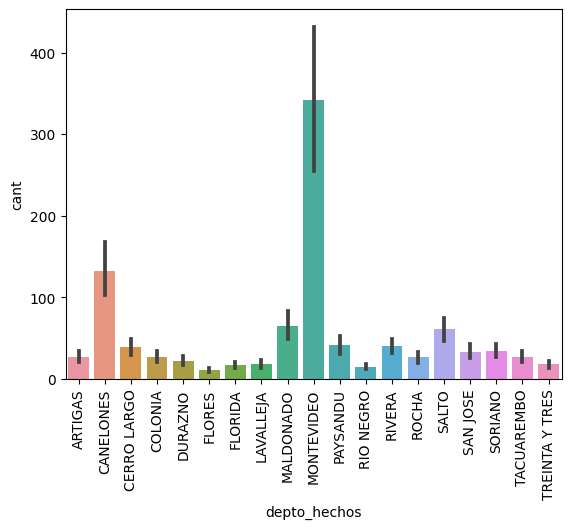

In [167]:
sb.barplot(x="depto_hechos",y="cant",data=df_group1)
plt.xticks(rotation=90)
plt.show()


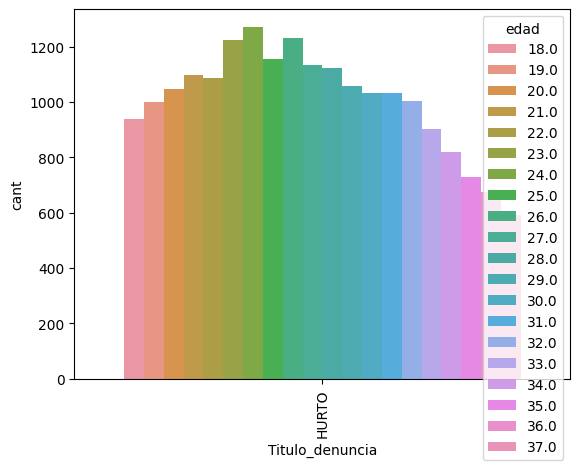

In [168]:
df_group2 = df_filter.groupby(['Titulo_denuncia','edad']).agg(cant=('edad', 'count'))
df_group2 = df_group2.reset_index()
df_group2 = df_group2.sort_values(by='cant', ascending=False)

#sb.barplot(x="Titulo_denuncia",y="cant",data=df_group2.head(10))
sb.barplot(x="Titulo_denuncia",y="cant",hue="edad",data=df_group2.head(20))
plt.xticks(rotation=90)
plt.show()

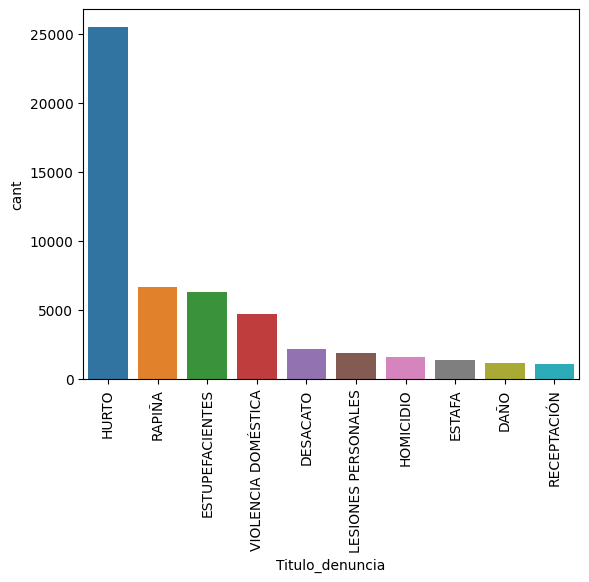

In [169]:
df_group2 = df_filter.groupby(['Titulo_denuncia']).agg(cant=('Titulo_denuncia', 'count'))
df_group2 = df_group2.reset_index()
df_group2 = df_group2.sort_values(by='cant', ascending=False)
df_group2
sb.barplot(x="Titulo_denuncia",y="cant",data=df_group2.head(10))
# #sb.barplot(x="depto_hechos",y="cant",hue="depto_hechos",data=df_group1)
plt.xticks(rotation=90)
plt.show()

In [170]:
df.loc[df['edad'].isna(),['Titulo_denuncia']]

,Titulo_denuncia
47,HURTO
57,ESTUPEFACIENTES
90,HURTO
138,ESTUPEFACIENTES
139,ESTAFA
...,...
68364,RAPIÑA
68402,ESTUPEFACIENTES
68405,HURTO
68433,"TRÁFICO INTERNO, FABRICACIÓN ILEGAL DE ARMAS D..."


In [171]:
df.loc[9,['fecha_resolución']]

fecha_resolución    NaT
Name: 9, dtype: object

In [172]:
serie_dif_date = df['fecha_resolución']-df['fecha_primera_audi']
df['diff_days_fpa_fr'] = serie_dif_date.dt.days

In [173]:
df.iloc[[9]]

,Titulo_denuncia,depto_hechos,fecha_hecho,mes_primera _audi,fecha_primera_audi,fecha_resolución,edad,edad_tramos,sexo,delito_imputado,delitos_agrupados,situación_procesal,diff_days_fpa_fr
9,ABUSO DE FUNCIONES EN CASOS NO PREVISTOS POR L...,MONTEVIDEO,2020-06-01,2022-03,2022-03-08,NaT,41.0,36-45,F,ABUSO DE FUNCIONES,Funcionarios publicos,"FORMALIZADA, CONTINÚA INVESTIGACIÓN",NaN


In [174]:
def media_fr(delito):
    filtered = df[(~df['diff_days_fpa_fr'].isna())&(df['delito_imputado']==delito)]
    filtered

In [175]:
df.loc[df['fecha_resolución'].isnull(),:].head(3)

,Titulo_denuncia,depto_hechos,fecha_hecho,mes_primera _audi,fecha_primera_audi,fecha_resolución,edad,edad_tramos,sexo,delito_imputado,delitos_agrupados,situación_procesal,diff_days_fpa_fr
9,ABUSO DE FUNCIONES EN CASOS NO PREVISTOS POR L...,MONTEVIDEO,2020-06-01,2022-03,2022-03-08,NaT,41.0,36-45,F,ABUSO DE FUNCIONES,Funcionarios publicos,"FORMALIZADA, CONTINÚA INVESTIGACIÓN",NaN
11,HOMICIDIO,MONTEVIDEO,2021-07-13,2021-09,2021-09-03,NaT,33.0,26-35,M,TENENCIA NO AUTORIZADA DE ARMA DE FUEGO MUNICI...,Armas de fuego y explosivos,"FORMALIZADA, CONTINÚA INVESTIGACIÓN",NaN
20,PORTE Y/O TENENCIA DE ARMAS,MONTEVIDEO,2022-11-01,2022-11,2022-11-02,NaT,13.0,- 18,M,PORTE Y/O TENENCIA DE ARMAS,Armas de fuego y explosivos,"FORMALIZADA, CONTINÚA INVESTIGACIÓN",NaN
